Samuel Atilano

Spring 2025

CS343: Neural Networks

Project 3: Convolutional Neural Networks

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.show()
plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=7)

# Automatically reload your external source code
%load_ext autoreload
%autoreload 2

## Goal

**Make sure any debug printouts do not appear if `verbose=False`!**

This week, you will test your CNN on the STL-10 dataset! The last step before you can do this is implementing an optimizer to update your network weights during gradient descent. You will implement a few and compare them.

## Task 5: Implement weight optimizers for gradient descent

To change the weights during training, we need an optimization algorithm to have our loss decrease over epochs as we learn the structure of the input patterns. Until now, we used **Stochastic gradient descent (SGD)**, which is the simplest algorithm. You will implement 4 popular algorithms:

1. `SGD` (stochastic gradient descent)
2. `SGD_Momentum` (stochastic gradient descent with momentum)
3. `Adam` (Adaptive Moment Estimation)
4. `AdamW` (Adaptive Moment Estimation Weight decay) <br/>*Skip AdamW for now. There is a task below that focuses on this optimizer.*

Implement each of these according to the update equations (the `update_weights()` in each subclass in `optimizer.py`). Let's use $w_t$ in the math below to represent the weights in a layer at time step $t$, $dw$ to represent the gradient of the weights in a layer, and $\eta$ represent the learning rate. We use vectorized notation below (update applies to all weights element-wise). Then:

**SGD**: 

$w_{t} = w_{t-1} - \eta \times dw$

**SGD (momentum)**:

$v_{t} = m \times v_{t-1} - \eta \times dw$

$w_{t} = w_{t-1} + v_t$

where $v_t$ is called the `velocity` at time $t$. At the first time step (0), velocity should be set to all zeros and have the same shape as $w$. $m$ is a constant that determines how much of the gradient obtained on the previous time step should factor into the weight update for the current time step.


**Adam**:

$v_{t} = \beta_1 \times v_{t-1} + (1 - \beta_1)\times dw$

$p_{t} = \beta_2 \times p_{t-1} + (1 - \beta_2)\times dw^2$

$vc = v_{t} / \left (1-(\beta_1^t) \right )$

$pc = p_{t} / \left (1-(\beta_2^t) \right )$

$w_{t} = w_{t-1} - \left ( \eta \times vc \right ) / \left ( \sqrt(pc) + \epsilon \right ) $


Like SGD (momentum), Adam records momentum terms $v$ and $p$. At time step 0, you should initialize them to zeros in an array equal in size to the weights. $vc$ and $pc$ are variables computed on each time step. The remaining quantities are constants. Note that $t$ keeps track of the integer time step, and needs to be incremented on each update. 


In [2]:
from optimizer import *

####  Test SGD

In [3]:
rng = np.random.default_rng(0)

wts = np.arange(-3, 3, dtype=np.float64)
d_wts = rng.standard_normal(len(wts))

optimizer = SGD()
optimizer.prepare(wts, d_wts)

new_wts_1 = optimizer.update_weights()
new_wts_2 = optimizer.update_weights()

print(f'SGD: Wts after 1 iter {new_wts_1}')
print(f'SGD: Wts after 2 iter {new_wts_2}')

SGD: Wts after 1 iter [-3.012573  -1.9867895 -1.0640423 -0.01049    1.0535669  1.9638405]
SGD: Wts after 2 iter [-3.025146  -1.973579  -1.1280845 -0.02098    1.1071339  1.927681 ]


Output should be:

    SGD: Wts after 1 iter [-3.012573  -1.9867895 -1.0640423 -0.01049    1.0535669  1.9638405]
    SGD: Wts after 2 iter [-3.025146  -1.973579  -1.1280845 -0.02098    1.1071339  1.927681 ]

####  Test SGD_Momentum

In [4]:
rng = np.random.default_rng(0)

wts = rng.standard_normal((3, 4))
d_wts = rng.standard_normal((3, 4))

optimizer = SGD_Momentum(lr=0.1, m=0.6)
optimizer.prepare(wts, d_wts)

new_wts_1 = optimizer.update_weights()
new_wts_2 = optimizer.update_weights()

print(f'SGD M: Wts after 1 iter\n{new_wts_1}')
print(f'SGD M: Wts after 2 iter\n{new_wts_2}')

SGD M: Wts after 1 iter
[[ 0.3582333 -0.1102257  0.7650137  0.1781269]
 [-0.4812435  0.3932251  1.262837   0.8428296]
 [-0.6908818 -1.4020678 -0.556755   0.006175 ]]
SGD M: Wts after 2 iter
[[ 0.7302382 -0.075219   0.9643595  0.2952896]
 [-0.394162   0.4438331  1.1969761  0.6760275]
 [-0.6703162 -1.620702  -0.4503238 -0.0500666]]


Output should be:

    SGD M: Wts after 1 iter
    [[ 0.3582333 -0.1102257  0.7650137  0.1781269]
    [-0.4812435  0.3932251  1.262837   0.8428296]
    [-0.6908818 -1.4020678 -0.556755   0.006175 ]]
    SGD M: Wts after 2 iter
    [[ 0.7302382 -0.075219   0.9643595  0.2952896]
    [-0.394162   0.4438331  1.1969761  0.6760275]
    [-0.6703162 -1.620702  -0.4503238 -0.0500666]]

####  Test Adam

In [5]:
rng = np.random.default_rng(0)

wts = rng.standard_normal((3, 4))
d_wts = rng.standard_normal((3, 4))

optimizer = Adam(lr=0.1)
optimizer.prepare(wts, d_wts)

new_wts_1 = optimizer.update_weights()
new_wts_2 = optimizer.update_weights()
new_wts_3 = optimizer.update_weights()

print(f'Adam: Wts after 1 iter\n{new_wts_1}')
print(f'Adam: Wts after 2 iter\n{new_wts_2}')
print(f'Adam: Wts after 3 iter\n{new_wts_3}')

Adam: Wts after 1 iter
[[ 0.2257302 -0.0321049  0.7404226  0.2049001]
 [-0.4356694  0.4615951  1.204      0.847081 ]
 [-0.6037352 -1.3654215 -0.5232745 -0.058674 ]]
Adam: Wts after 2 iter
[[ 0.3257302  0.0678951  0.8404226  0.3049001]
 [-0.3356694  0.561595   1.104      0.747081 ]
 [-0.5037353 -1.4654215 -0.4232745 -0.158674 ]]
Adam: Wts after 3 iter
[[ 0.4257302  0.1678951  0.9404226  0.4049001]
 [-0.2356694  0.661595   1.0040001  0.647081 ]
 [-0.4037353 -1.5654215 -0.3232745 -0.258674 ]]


Output should be:

    Adam: Wts after 1 iter
    [[ 0.2257302 -0.0321049  0.7404226  0.2049001]
    [-0.4356694  0.4615951  1.204      0.847081 ]
    [-0.6037352 -1.3654215 -0.5232745 -0.058674 ]]
    Adam: Wts after 2 iter
    [[ 0.3257302  0.0678951  0.8404226  0.3049001]
    [-0.3356694  0.561595   1.104      0.747081 ]
    [-0.5037353 -1.4654215 -0.4232745 -0.158674 ]]
    Adam: Wts after 3 iter
    [[ 0.4257302  0.1678951  0.9404226  0.4049001]
    [-0.2356694  0.661595   1.0040001  0.647081 ]
    [-0.4037353 -1.5654215 -0.3232745 -0.258674 ]] 

## Task 6: Write network training methods

Implement methods in `network.py` to actually train the network, using all the building blocks that you have created. The methods to implement are:

- `predict`
- `fit`

## Task 7: Overfitting a convolutional neural network

Usually we try to prevent overfitting, but we can use it as a valuable debugging tool to test out a complex backprop-based neural network. Assuming everything is working, it is almost always the case that we should be able to overfit a tiny dataset with a huge model with tons of parameters (i.e. your CNN). You will use this strategy to verify that your network is working.

Let's use a small amount of real data from STL-10 to perform the overfitting test.

### 7a. Move `load_stl10_dataset` and `preprocess_data.py` from the MLP project

Make the one following change in `preprocess_data.py`:

- In `preprocess_stl`, Re-arrange dimensions of `imgs` so that when it is returned, `shape=(Num imgs, RGB color chans, height, width)` (No longer flatten non-batch dimensions)
- In `load_stl10`, add an optional parameter to the function `scale_fact=3`, which specifies the factor by which to downscale the STL-10 images. The default (`scale_fact=3`) reduces the resolution from 96x96 to 32x32. Achieve this downscaling by passing along the optional parameter value when the `load` function in `load_stl10_dataset.py`.

In [6]:
import load_stl10_dataset
import preprocess_data
from network import ConvNet4

### 7b. Load in STL-10 at 16x16 resolution

If you don't want to wait for STL-10 to download from the internet and resize, copy over your data and numpy folders from your MLP project.

**Note:** The different train/test split here won't work if you hard coded the proportions in your `create_splits` implementation! *This isn't catastrophic, it just means that it will take longer to compute accuracy on the validation set.*

In [7]:
# Download the STL-10 dataset from the internet, convert it to Numpy ndarray, resize to 16x16
# cache it locally on your computer for faster loading next time.
load_stl10_dataset.purge_cached_dataset()
# preprocess and create splits
x_train, y_train, x_test, y_test, x_val, y_val, x_dev, y_dev = preprocess_data.load_stl10(
    n_train_samps=4578, n_test_samps=400, n_valid_samps=2, n_dev_samps=20, scale_fact=6)

print ('Train data shape: ', x_train.shape)
print ('Train labels shape: ', y_train.shape)
print ('Test data shape: ', x_test.shape)
print ('Test labels shape: ', y_test.shape)
print ('Validation data shape: ', x_val.shape)
print ('Validation labels shape: ', y_val.shape)
print ('dev data shape: ', x_dev.shape)
print ('dev labels shape: ', y_dev.shape)

Images are: (5000, 96, 96, 3)
Labels are: (5000,)
Resizing 5000 images to 16x16...Done!
Saving Numpy arrays the images and labels to ./numpy...Done!
Train data shape:  (4578, 3, 16, 16)
Train labels shape:  (4578,)
Test data shape:  (400, 3, 16, 16)
Test labels shape:  (400,)
Validation data shape:  (2, 3, 16, 16)
Validation labels shape:  (2,)
dev data shape:  (20, 3, 16, 16)
dev labels shape:  (20,)


### 7c. Train and overfit the network on a small STL-10 sample with each optimizer

#### Goal

If your network works, you should see a drop in loss over epochs to 0 from the initial value of ~2.3.

#### Todo

In 3 seperate cells below

- Create 3 different `ConvNet4` networks.
- Compile each with a different optimizer — SGD, SGD-M, and Adam (i.e. each net uses a different optimizer and skip AdamW here).
- Train each on the **dev** set and validate on the tiny validation set (we don't care about out-of-training-set performance here).

You will be making plots demonstrating the overfitting for each optimizer below. **You should train the nets with the same number of epochs such that at least 2/3 of them clearly show loss convergence to a small value; one optimizer may not converge yet, and that's ok**. Cut off the simulations based on the 2/3 that do converge.

#### Guidelines

- To set up a fair comparison across optimizers, you should train your networks with the same hyperparameters each time (*e.g. don't use a different learning rate for different optimizers*).
- Weight scales and learning rates of `1e-2` should work well.
- Start by testing the Adam optimizer.
- Remember that the input shape is (3, 16, 16). You need to specify this to the network constructor.
- The hyperparameters are up to you, though I wouldn't recommend a batch size that is too small (close to 1), otherwise it may be tricky to see whether the loss is actually decreasing on average.
- Decreasing `acc_freq` will make the `fit` function evaluate the training and validation accuracy more often. This is a computationally intensive process, so small values come with an increase in training time. On the other hand, checking the accuracy too infrequently means you won't know whether the network is trending toward overfitting the training data, which is what you're checking for.
- Each training session takes ~15 mins on my laptop.

#### Caveat emptor

Training convolutional networks is notoriously computationally intensive. If you experiment with hyperparameters, each training session may take several hours.

- Use the loss/accuracy print outs to quickly gauge whether your hyperparameter choices are getting your network to decrease in loss.
- Monitor print outs and interrupt the Jupyter kernel if things are not trending in the right direction.

In [8]:
#Coming up with Hyperparameters
lr_hyp = 1e-2
wt_scale = 1e-2
input_shape = (3,16,16)
n_kers = (16,)
ker_sz = (4,)
mini_batch_sz = 5
n_epoch = 150
acc_freq = 20
seed_hyp = 2




In [9]:
# Adam

#Creating the network
adam_net = ConvNet4(input_shape= input_shape, n_kers= n_kers, ker_sz = ker_sz, wt_scale=wt_scale, r_seed=seed_hyp, reg=0, verbose=False)
adam_net.compile('adam', lr = lr_hyp)

#Conducting the Fit
loss_his_adam, train_acc_adam, val_acc_adam = adam_net.fit(x_dev, y_dev, x_val, y_val, mini_batch_sz=mini_batch_sz, n_epochs=n_epoch, acc_freq=acc_freq)


Finished creating network
n_epoch: 150, iter_per_epoch: 4

The Time at start of Fit: 1746065533.588925, and the time to complete Fit: 2.3430299758911133
Training Accuracy0.2, Validation Accuracy0.5
Iteration: 0/600. Training Loss:2.2949422777311432
Training Accuracy0.5, Validation Accuracy0.0
Training Accuracy0.85, Validation Accuracy0.5
Iteration: 50/600. Training Loss:0.8703999994336432
Training Accuracy0.85, Validation Accuracy0.5
Training Accuracy0.95, Validation Accuracy0.0
Training Accuracy1.0, Validation Accuracy0.0
Iteration: 100/600. Training Loss:0.009933198984807684
Training Accuracy1.0, Validation Accuracy0.5
Training Accuracy1.0, Validation Accuracy0.5
Iteration: 150/600. Training Loss:0.00014139904150643404
Training Accuracy1.0, Validation Accuracy0.5
Training Accuracy1.0, Validation Accuracy0.5
Training Accuracy1.0, Validation Accuracy0.5
Iteration: 200/600. Training Loss:0.00039555597517561524
Training Accuracy1.0, Validation Accuracy0.5
Training Accuracy1.0, Validation

In [10]:
# SGD-M

#Creating the network
sgdm_net = ConvNet4(input_shape= input_shape, n_kers= n_kers, ker_sz = ker_sz, wt_scale=wt_scale, r_seed=seed_hyp, verbose=False)
sgdm_net.compile('sgdm', lr = lr_hyp)

#Conducting the Fit
loss_his_sgdm, train_acc_sgdm, val_acc_sgdm = sgdm_net.fit(x_dev, y_dev, x_val, y_val, mini_batch_sz,n_epochs=n_epoch, acc_freq=acc_freq)

Finished creating network
n_epoch: 150, iter_per_epoch: 4

The Time at start of Fit: 1746065658.7770805, and the time to complete Fit: 1.9741225242614746
Training Accuracy0.15, Validation Accuracy0.5
Iteration: 0/600. Training Loss:2.2949422777311432
Training Accuracy0.25, Validation Accuracy0.5
Training Accuracy0.25, Validation Accuracy0.5
Iteration: 50/600. Training Loss:2.167129264250047
Training Accuracy0.25, Validation Accuracy0.5
Training Accuracy0.35, Validation Accuracy0.5
Training Accuracy0.5, Validation Accuracy0.0
Iteration: 100/600. Training Loss:0.9023032702232314
Training Accuracy0.7, Validation Accuracy0.5
Training Accuracy0.75, Validation Accuracy0.0
Iteration: 150/600. Training Loss:0.3154257203122599
Training Accuracy0.9, Validation Accuracy0.5
Training Accuracy1.0, Validation Accuracy0.5
Training Accuracy1.0, Validation Accuracy0.5
Iteration: 200/600. Training Loss:0.0051061712164452875
Training Accuracy1.0, Validation Accuracy0.5
Training Accuracy1.0, Validation Acc

In [11]:
# SGD

#Creating the network
sgd_net = ConvNet4(input_shape= input_shape, n_kers= n_kers, ker_sz = ker_sz, wt_scale=wt_scale, r_seed=seed_hyp, verbose=False)
sgd_net.compile('sgd', lr = lr_hyp)

#Conducting the Fit
loss_his_sgd, train_acc_sgd, val_acc_sgd = sgd_net.fit(x_dev, y_dev, x_val, y_val, mini_batch_sz,n_epochs=n_epoch, acc_freq=acc_freq)

Finished creating network
n_epoch: 150, iter_per_epoch: 4

The Time at start of Fit: 1746065780.3372474, and the time to complete Fit: 2.129993438720703
Training Accuracy0.15, Validation Accuracy0.5
Iteration: 0/600. Training Loss:2.2949422777311432
Training Accuracy0.25, Validation Accuracy0.5
Training Accuracy0.25, Validation Accuracy0.5
Iteration: 50/600. Training Loss:2.2775252538285584
Training Accuracy0.25, Validation Accuracy0.5
Training Accuracy0.25, Validation Accuracy0.5
Training Accuracy0.25, Validation Accuracy0.5
Iteration: 100/600. Training Loss:2.238946728029509
Training Accuracy0.25, Validation Accuracy0.5
Training Accuracy0.25, Validation Accuracy0.5
Iteration: 150/600. Training Loss:2.1791178882024504
Training Accuracy0.25, Validation Accuracy0.5
Training Accuracy0.25, Validation Accuracy0.5
Training Accuracy0.25, Validation Accuracy0.5
Iteration: 200/600. Training Loss:2.239158060337996
Training Accuracy0.25, Validation Accuracy0.5
Training Accuracy0.25, Validation A

### 7d. Evaluate and plot the different optimizer results

Make 2 "high quality" plots showing the following

- Plot the accuracy (y axis) for the three optimizers as a function of training epoch (x axis).
- Plot the loss (y axis) for the three optimizers as a function of training iteration (x axis).

A high quality plot consists of:
- A useful title
- X and Y axis labels
- A legend

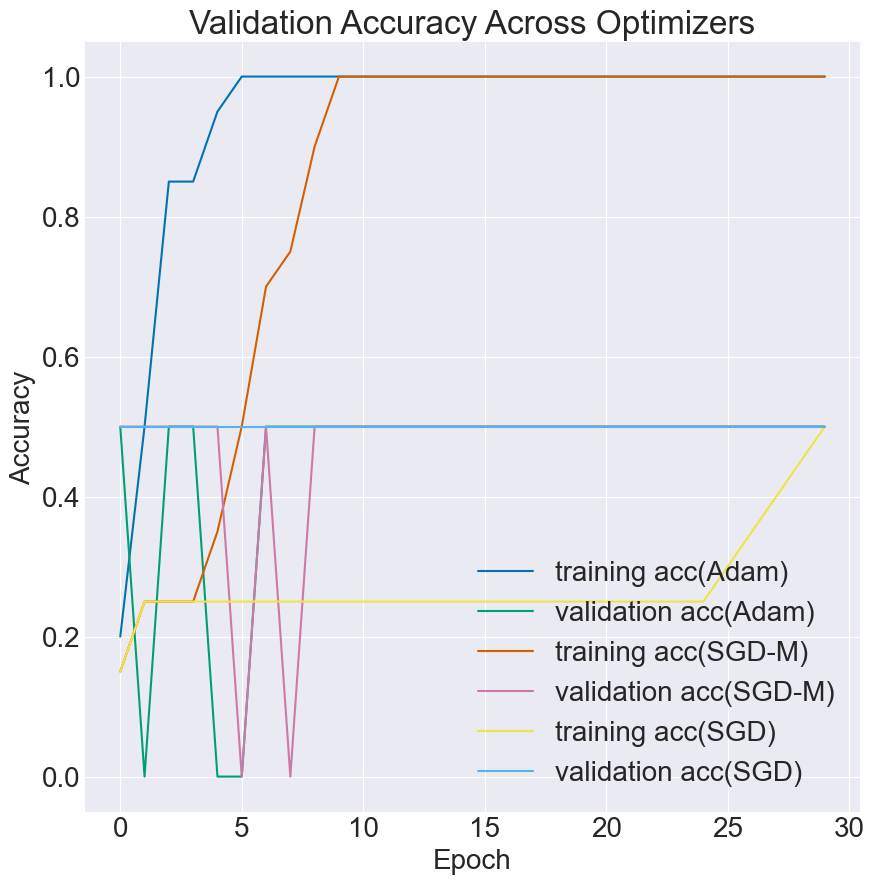

In [12]:
#The Accuracy Plots

plt.figure(figsize=(10,10))
plt.plot(train_acc_adam, label='training acc(Adam)')
plt.plot(val_acc_adam, label='validation acc(Adam)')

plt.plot(train_acc_sgdm, label='training acc(SGD-M)')
plt.plot(val_acc_sgdm, label='validation acc(SGD-M)')

plt.plot(train_acc_sgd, label='training acc(SGD)')
plt.plot(val_acc_sgd, label='validation acc(SGD)')

plt.title('Validation Accuracy Across Optimizers')
plt.xlabel('Epoch')
plt.ylabel("Accuracy")
plt.legend()
plt.show()

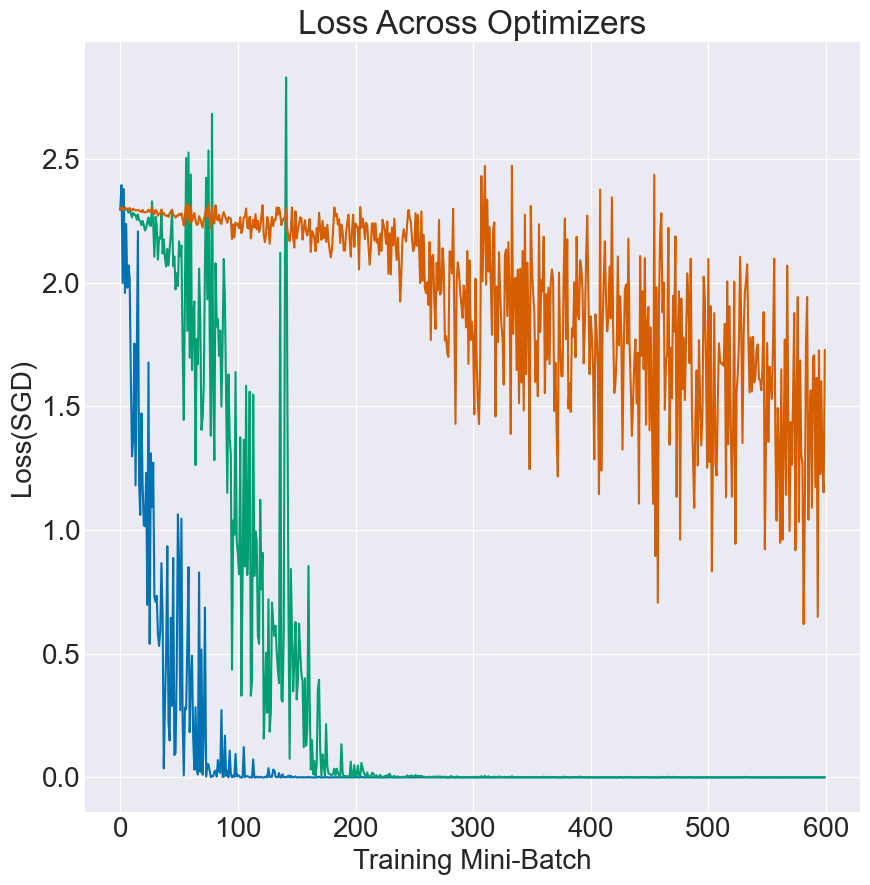

In [13]:
#The Loss Plots
plt.figure(figsize=(10,10))
plt.plot(loss_his_adam, label = "Adam Loss")
plt.plot(loss_his_sgdm, label = "SGD-M Loss")
plt.plot(loss_his_sgd, label = "SGD Loss")

plt.title('Loss Across Optimizers')
plt.xlabel('Training Mini-Batch')
plt.ylabel('Loss(SGD)')
plt.show()

### 7e. Questions

**Question 4**: Why does decreasing the mini-batch size make the loss print-outs more erratic in Task 7c?

**Question 5**: Which optimizer works best and why do think it is best?

**Question 6**: What is happening with the training set accuracy and why?

**Answer 4:**

The benefits of having a good mini-batch size for the network is memory and the averaging effects on the loss. So, by decreasing the mini-batch size means there would be less data values from the original training data passed through the forward/backward pass. This results in erradtic loss printouts because there would be more noise in the calculations of the loss. 


**Answer 5:**

The optimizer that worked best was the Adam optimizer. I saw how the loss decreased much faster than the SGD and SGD-M optimizers. I think it's the best because it has adapative learning rates, which allows it to converge much sooner than the other optimizers. 


**Answer 6:**

Throughout the network training of the 3 optimizers, the training accuracy reaches 1.0 for each. This is a sign that the network is overfitting on the Dev data. With the network overfitting on a small portion of the data, it tells us that the network is working and functional as intended

## Task 8: Training your convolutional neural network on STL-10

### 8a. Load in STL-10 at 32x32 resolution

In [14]:
# Download the STL-10 dataset from the internet, convert it to Numpy ndarray, resize to 16x16
# cache it locally on your computer for faster loading next time.
load_stl10_dataset.purge_cached_dataset()
# preprocess and create splits
x_train, y_train, x_test, y_test, x_val, y_val, x_dev, y_dev = preprocess_data.load_stl10(
    n_train_samps=4398, n_test_samps=400, n_valid_samps=200, n_dev_samps=2, scale_fact=3)

print ('Train data shape: ', x_train.shape)
print ('Train labels shape: ', y_train.shape)
print ('Test data shape: ', x_test.shape)
print ('Test labels shape: ', y_test.shape)
print ('Validation data shape: ', x_val.shape)
print ('Validation labels shape: ', y_val.shape)
print ('dev data shape: ', x_dev.shape)
print ('dev labels shape: ', y_dev.shape)

Images are: (5000, 96, 96, 3)
Labels are: (5000,)
Resizing 5000 images to 32x32...Done!
Saving Numpy arrays the images and labels to ./numpy...Done!
Train data shape:  (4398, 3, 32, 32)
Train labels shape:  (4398,)
Test data shape:  (400, 3, 32, 32)
Test labels shape:  (400,)
Validation data shape:  (200, 3, 32, 32)
Validation labels shape:  (200,)
dev data shape:  (2, 3, 32, 32)
dev labels shape:  (2,)


### 8b. Set up accelerated convolution and max pooling layers

As you may have noticed, we had to downsize STL-10 to 16x16 resolution to train the network on the dev set (N=20) in a reasonable amount of time. The training set has N≅4000 samples, how will we ever manage to process that amount of data?!

On one hand, this is an unfortunate inevitable reality of working with large ("big") datasets: you can easily find a dataset that is too time consuming to process for any computer, despite how fast/many CPU/GPUs it has.

On the other hand, we can do better for this project and STL-10 :) If you were to time (profile) different parts of the training process, you'd notice that largest bottleneck is convolution and max pooling operations (both forward/backward). You implemented those operations intuitively, which does not always yield the best performance. **By swapping out forward/backward convolution and maxpooling for implementations that use different algorithms (im2col, reshaping) that are compiled to optimized machine code tailored for your computer using the JAX library, we will speed up training up by several orders of magnitude**. JAX should automatically "max out" all the CPU cores your computer has available to speed up training.

Follow these steps to substitute in the "accelerated" convolution and max pooling layers.

- Create a class called `Conv4NetAccel` in `network.py` by copy-pasting the contents of `Conv4Net`.
- Import `accelerated_layer` at the top and replace the `Conv2D` and `MaxPooling2D` layers with `Conv2DAccel` and `MaxPooling2DAccel`.

### 8c. Training convolutional neural network on STL-10

You are now ready to train on the entire training set.

- Create a `Conv4NetAccel` object with hyperparameters of your choice.
- Your goal is to achieve at least 45% accuracy on the test and/or validation set.

#### Notes

- This should not be overly challenging. If the default hyperparameters are not getting you to 45%, you may have to change several hyperparameters. Try to change as few as possible. I suggest using your intuition about which hyperparameters to change and monitoring loss and accuracy during training to see if the change is effective (*rather than doing a grid search*). 
- Use the best / most efficient optimizer based on your prior analysis.
- It should take roughly 1 sec per training iteration. If that's way off, seek help as something could be wrong with running the accelerated code.

In [15]:
from network import ConvNet4Accel

In [16]:
#Local Variables
n_epoch = 120 #was 150

#Creating conv4accel object
accel_net = ConvNet4Accel(verbose=False)
accel_net.compile('adam')
accel_loss, accel_train, accel_val = accel_net.fit(x_train, y_train, x_val, y_val,n_epochs=n_epoch, acc_freq=acc_freq)

Finished creating network
n_epoch: 120, iter_per_epoch: 17

The Time at start of Fit: 1746065904.374699, and the time to complete Fit: 23.22497797012329
Training Accuracy0.15688949522510232, Validation Accuracy0.125
Iteration: 0/2040. Training Loss:2.3024219965577775
Training Accuracy0.2760345611641655, Validation Accuracy0.22
Training Accuracy0.32855843565256937, Validation Accuracy0.295
Iteration: 50/2040. Training Loss:1.8196600562504375
Training Accuracy0.35288767621646205, Validation Accuracy0.32
Training Accuracy0.4158708503865393, Validation Accuracy0.33
Training Accuracy0.42837653478854026, Validation Accuracy0.355
Iteration: 100/2040. Training Loss:1.6131448149534513
Training Accuracy0.4517962710322874, Validation Accuracy0.36
Training Accuracy0.45702592087312416, Validation Accuracy0.35
Iteration: 150/2040. Training Loss:1.5196891176614247
Training Accuracy0.4963619827194179, Validation Accuracy0.34
Training Accuracy0.502955889040473, Validation Accuracy0.36
Training Accuracy

### 8d. Analysis of STL-10 training quality

Use your trained network that achieves 45%+ accuracy on the test set to make "high quality" plots showing the following 

- Plot the accuracy of the training and validation sets as a function of training epoch. You may have to convert iterations to epochs.
- Plot the loss as a function of training iteration.

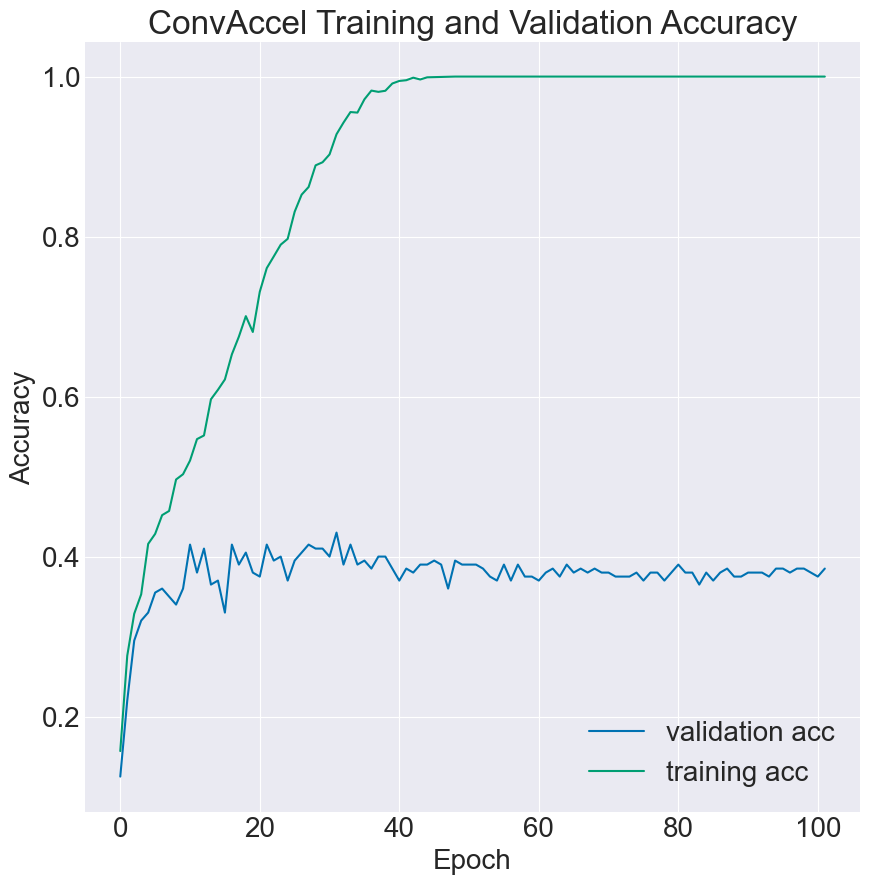

In [17]:
#The Training and Validation Plots
plt.figure(figsize=(10,10))
plt.plot(accel_val, label='validation acc')
plt.plot(accel_train, label='training acc')

plt.title('ConvAccel Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel("Accuracy")
plt.legend()
plt.show()

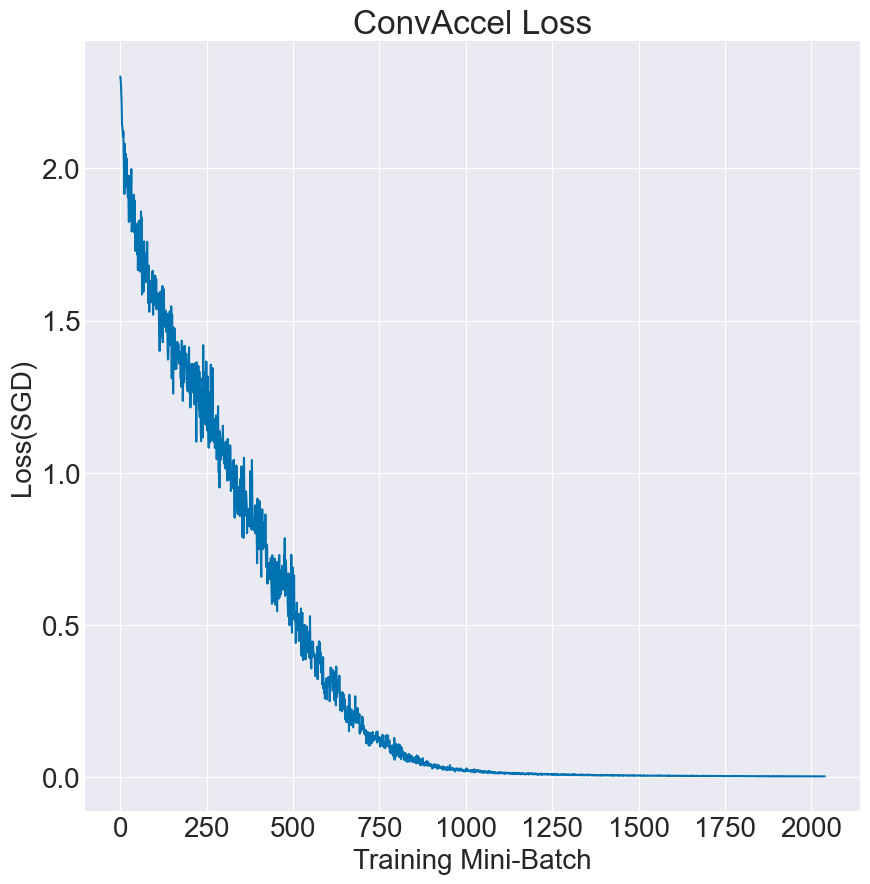

In [18]:
#The Loss Plots
plt.figure(figsize=(10,10))
plt.plot(accel_loss, label = "Accel Loss")

plt.title('ConvAccel Loss')
plt.xlabel('Training Mini-Batch')
plt.ylabel('Loss(SGD)')
plt.show()

### 8e. Visualize layer weights

Run the following code and submit the inline image of the weight visualization of the 1st layer (convolutional layer) of the network.

**Note:**
- Setting optional parameter to `True` will let you save a .PNG file in your project folder of your weights. I'd suggest setting it to `False` unless look at your weights and they look like they are worth saving. You don't want a training run that produces undesirable weights to overwrite your good looking results!

In [19]:
def plot_weights(wts, saveFig=True, filename='convWts.png'):
    grid_sz = int(np.sqrt(len(wts)))
    plt.figure(figsize=(10,10))
    for x in range(grid_sz):
        for y in range(grid_sz):
            lin_ind = np.ravel_multi_index((x, y), dims=(grid_sz, grid_sz))
            plt.subplot(grid_sz, grid_sz, lin_ind+1)
            currImg = wts[lin_ind]
            low, high = np.min(currImg), np.max(currImg)
            currImg = 255*(currImg - low) / (high - low)
            currImg = currImg.astype('uint8')
            plt.imshow(currImg)
            plt.gca().axis('off')
    plt.subplots_adjust(wspace=0.01, hspace=0.01)
    if saveFig:
        plt.savefig(filename)
    plt.show()

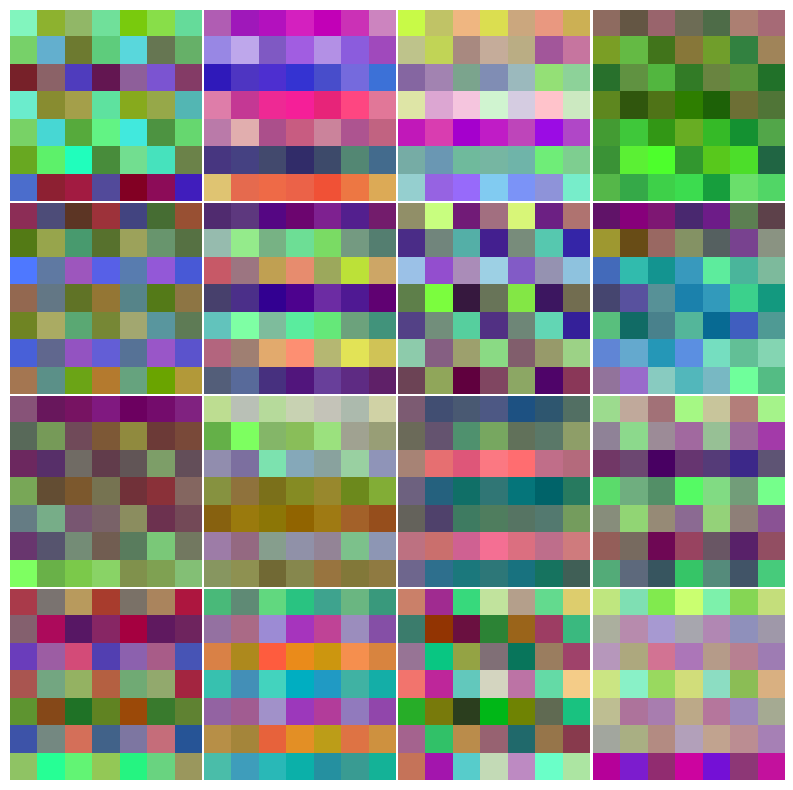

In [20]:
# Subsitute your trained network below
# netT is my network's name
# Every weight should not look like RGB noise
plot_weights(accel_net.layers[0].wts.transpose(0, 2, 3, 1), saveFig=True, filename='filters.png')

### 8f. Questions

**Question 7:** What do the learned filters look like? Does this make sense to you / is this what you expected? In which area of the brain do these filters resemble cell receptive fields?

#### Note

You should not see RGB "noise". If you do, and you pass the "overfit" test with the Adam optimizer, you probably need to increase the number of training epochs.

**Answer 7:**

The learned filters look like pixel checkerboards, this is not what I expected as I expected to have some sort of patterns. I believe this is a result of training over too many epochs. But this process took me 40 minutes and I need to turn this project in soon. 

## Task 9: Dropout

Now you are ready to explore how adding a Dropout layer to your CNN affects training and the accuracy of predictions.

### 9a. Create ConvNet4AccelV2 network

- Create a class in `network.py` called `ConvNet4AccelV2` that is the same as `ConvNet4Accel` except that we now add a single dropout layer before the output layer. The layers of your network should now look like:

Conv2D → MaxPool2D → Flatten → Dense → **Dropout** → Dense

In [21]:
from network import ConvNet4AccelV2

### 9b. Analyze effect of dropout on STL-10 loss and accuracy

Run an experiment in which you train four separate `ConvNet4AccelV2` nets, each with the same default hyperparameters except set the dropout rates to be `[0.0, 0.1, 0.5, 0.9]`, respectively. For example, the first net should have `0.0` dropout, the 2nd should have `0.1` dropout, etc. 

Create two high quality plots showing the:
1. training loss over training iterations.
2. test accuracy over the different dropout rates.

produced by each network.

**Training notes:**
- Use the optimizer that you found performs best from above.
- Use a random seed of `0` in all your nets.
- You should be able to keep most/all hyperparameters to their default values for this experiment.
- Training for only `5` epochs should be enough to produce the expected pattern of results. This means that the experiment should take only a few minutes to run. *You should be able to get higher accuracy if you train for more than 5 epochs (and you may do so if you so wish) but 5 epochs should be enough to demonstrate the effects of dropout, which is the goal here.*

If everything is working properly, you should find that at least one of the nonzero dropout settings yields better test accuracy.

In [22]:
#Creating the Local Vars
n_epochs = 5
rate1 = 0.0
rate2 = 0.1
rate3 = 0.5
rate4 = 0.9
rand_seed = 0
lr_accel = 1e-2
wt_scale = 1e-2

#Creating the nets
print("Net 1\n")
drop_net1 = ConvNet4AccelV2(dropout_rate=rate1, r_seed=rand_seed, verbose=False)
drop_net1.compile('adam')
net1_loss, net1_train, net1_test = drop_net1.fit(x_train, y_train, x_test, y_test, n_epochs=n_epochs)


print("Net 2\n")
drop_net2 = ConvNet4AccelV2(dropout_rate=rate2, r_seed=rand_seed, verbose=False)
drop_net2.compile('adam')
net2_loss, net2_train, net2_test = drop_net2.fit(x_train, y_train, x_test, y_test, n_epochs=n_epochs)


print("Net 3\n")
drop_net3 = ConvNet4AccelV2(dropout_rate=rate3, r_seed=rand_seed, verbose=False)
drop_net3.compile('adam')
net3_loss, net3_train, net3_test = drop_net3.fit(x_train, y_train, x_test, y_test, n_epochs=n_epochs)

print("Net 4\n")
drop_net4 = ConvNet4AccelV2(dropout_rate=rate4, r_seed=rand_seed, verbose=False)
drop_net4.compile('adam')
net4_loss, net4_train, net4_test = drop_net4.fit(x_train, y_train, x_test, y_test, n_epochs=n_epochs)

Net 1

Finished creating network
n_epoch: 5, iter_per_epoch: 17

The Time at start of Fit: 1746068374.946053, and the time to complete Fit: 1.3020644783973694
Training Accuracy0.1009549795361528, Validation Accuracy0.0875
Iteration: 0/85. Training Loss:2.3022839697524624
Training Accuracy0.24602091859936334, Validation Accuracy0.2225
Training Accuracy0.2755798090040928, Validation Accuracy0.265
Training Accuracy0.30445657116871305, Validation Accuracy0.2725
Training Accuracy0.32855843565256937, Validation Accuracy0.305
Training Accuracy0.34106412005457026, Validation Accuracy0.295
Iteration: 50/85. Training Loss:1.809857260810478
Training Accuracy0.3544793087767167, Validation Accuracy0.34
Training Accuracy0.3658481127785357, Validation Accuracy0.345
Training Accuracy0.3876762164620282, Validation Accuracy0.35
Net 2

Finished creating network
n_epoch: 5, iter_per_epoch: 17

The Time at start of Fit: 1746068543.9918153, and the time to complete Fit: 1.4814408620198567
Training Accuracy0

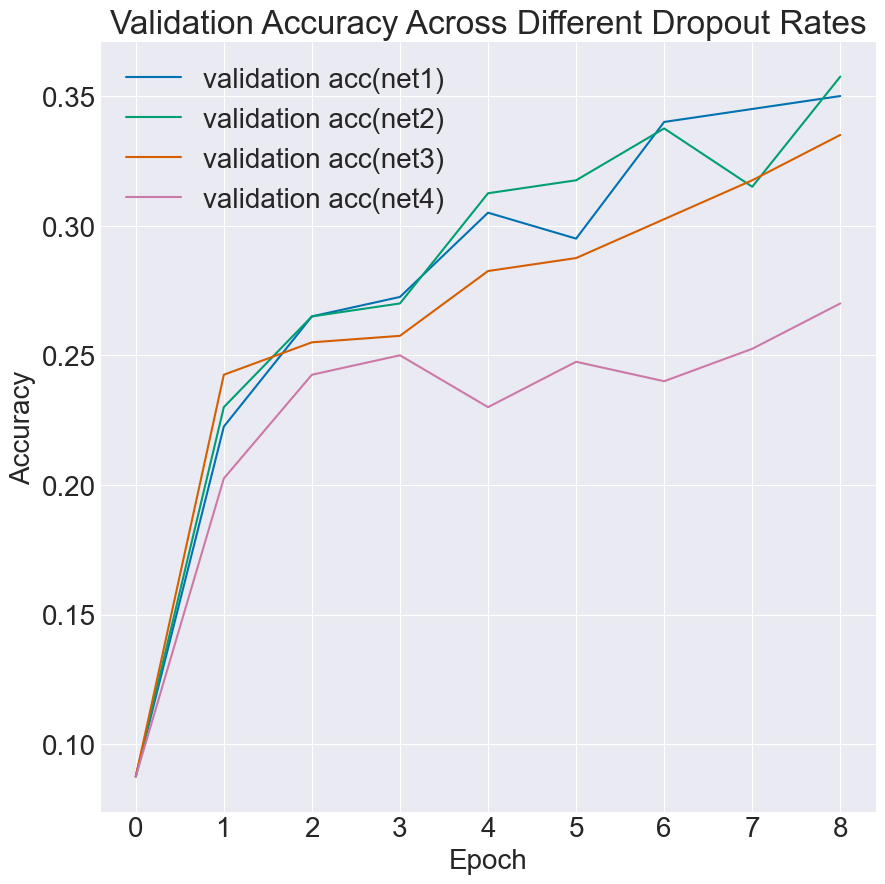

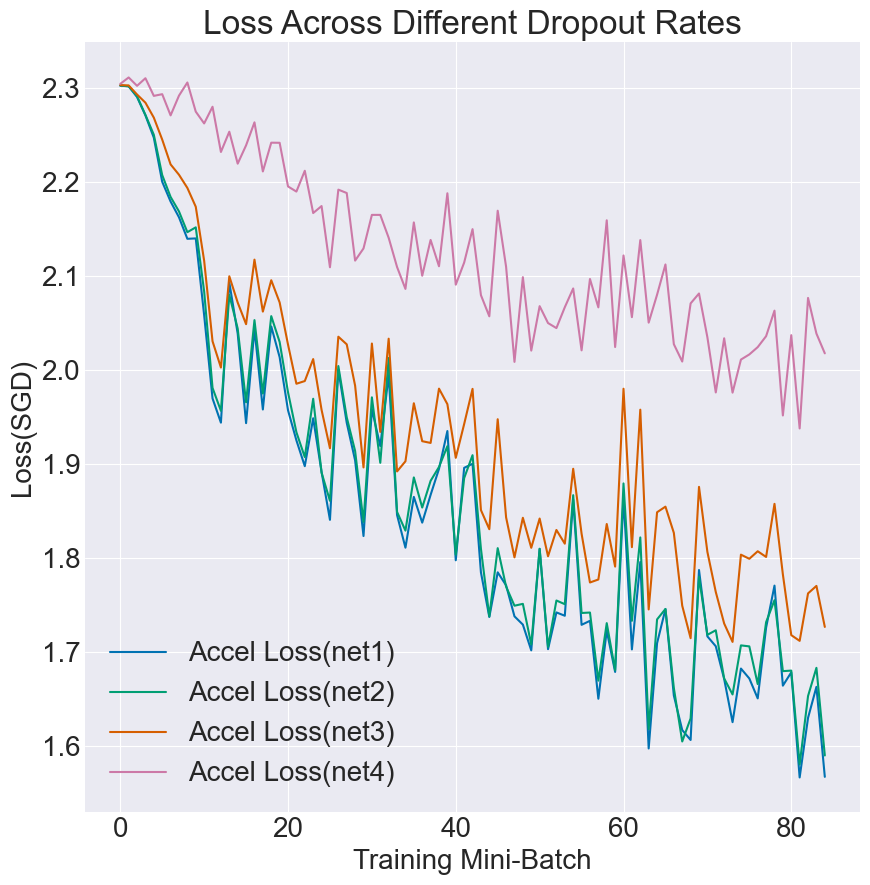

In [23]:
#The Training and Validation Plots
plt.figure(figsize=(10,10))
plt.plot(net1_test, label='validation acc(net1)')
#plt.plot(net1_train, label='training acc(net1)')

plt.plot(net2_test, label='validation acc(net2)')
#plt.plot(net2_train, label='training acc(net2)')

plt.plot(net3_test, label='validation acc(net3)')
#plt.plot(net3_train, label='training acc(net3)')

plt.plot(net4_test, label='validation acc(net4)')
#plt.plot(net4_train, label='training acc(net4)')

plt.title('Validation Accuracy Across Different Dropout Rates')
plt.xlabel('Epoch')
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#The Loss Plots
plt.figure(figsize=(10,10))
plt.plot(net1_loss, label = "Accel Loss(net1)")

plt.plot(net2_loss, label = "Accel Loss(net2)")

plt.plot(net3_loss, label = "Accel Loss(net3)")

plt.plot(net4_loss, label = "Accel Loss(net4)")

plt.title('Loss Across Different Dropout Rates')
plt.xlabel('Training Mini-Batch')
plt.ylabel('Loss(SGD)')
plt.legend()
plt.show()

### 9c. Questions

**Question 8:** What is the relationship between dropout and your training loss? Based on this, how would you expect the validation loss to look for the different dropout levels?

*There's no need to actually check the val loss here, this question is asking about your expectations based on your training loss results. You can check / do a deeper analysis for an extension (if you like).*

**Question 9:** How does the dropout rate appear to effect your test accuracy?

**Answer 8:** 

The relationship I see is that having a smaller dropout rate close to 0.0 reduces the loss a lot more compared to having higher dropout rates. Since the lower the dropout leads to the faster the networks converge on loss, I expect the validation loss converge even faster since they have less data points compared to the training data. 

**Answer 9:** 

Similarly to the training loss, the test accuracy increases faster when the dropout rate is lower and closer to 0.0.

## Task 10: Adam vs AdamW and weight decay

In this task, you will compare how the Adam and AdamW optimizers handle regularization.

### 10a. Implement and test AdamW

Implement AdamW in `optimizers.py`. You should be able to copy-paste the contents of your `Adam` class and add/change very few lines of code. This should be a very quick implementation. Review your class notes for the implementation strategy.

**Note:** You will need to change something about the constructor compared to Adam...

####  Test AdamW

In [24]:
rng = np.random.default_rng(0)

wts = rng.standard_normal((3, 4))
d_wts = rng.standard_normal((3, 4))

opt = AdamW(lr=0.1, reg=0)
opt.prepare(wts, d_wts)

new_wts_1 = opt.update_weights()
new_wts_2 = opt.update_weights()
new_wts_3 = opt.update_weights()

print('Test 1/2 (no reg):')
print(f'AdamW: Wts after 1 iter\n{new_wts_1}')
print(f'AdamW: Wts after 2 iter\n{new_wts_2}')
print(f'AdamW: Wts after 3 iter\n{new_wts_3}')
print(45*'-')

opt = AdamW(lr=0.1, reg=0.1)
opt.prepare(wts, d_wts)

new_wts_1 = opt.update_weights()
new_wts_2 = opt.update_weights()
new_wts_3 = opt.update_weights()

print('Test 2/2 (w/ reg):')
print(f'AdamW: Wts after 1 iter\n{new_wts_1}')
print(f'AdamW: Wts after 2 iter\n{new_wts_2}')
print(f'AdamW: Wts after 3 iter\n{new_wts_3}')

Test 1/2 (no reg):
AdamW: Wts after 1 iter
[[ 0.2257302 -0.0321049  0.7404226  0.2049001]
 [-0.4356694  0.4615951  1.204      0.847081 ]
 [-0.6037352 -1.3654215 -0.5232745 -0.058674 ]]
AdamW: Wts after 2 iter
[[ 0.3257302  0.0678951  0.8404226  0.3049001]
 [-0.3356694  0.561595   1.104      0.747081 ]
 [-0.5037353 -1.4654215 -0.4232745 -0.158674 ]]
AdamW: Wts after 3 iter
[[ 0.4257302  0.1678951  0.9404226  0.4049001]
 [-0.2356694  0.661595   1.0040001  0.647081 ]
 [-0.4037353 -1.5654215 -0.3232745 -0.258674 ]]
---------------------------------------------
Test 2/2 (w/ reg):
AdamW: Wts after 1 iter
[[ 0.2244729 -0.0307838  0.7340184  0.2038511]
 [-0.4303127  0.4579791  1.19096    0.8376102]
 [-0.5966979 -1.3527673 -0.5170417 -0.0590873]]
AdamW: Wts after 2 iter
[[ 0.3222282  0.069524   0.8266782  0.3018126]
 [-0.3260096  0.5533993  1.0790504  0.7292341]
 [-0.4907309 -1.4392396 -0.4118713 -0.1584964]]
AdamW: Wts after 3 iter
[[ 0.4190059  0.1688288  0.9184115  0.3987945]
 [-0.2227495  0

You should see:

        Test 1/2 (no reg):
        AdamW: Wts after 1 iter
        [[ 0.2257302 -0.0321049  0.7404226  0.2049001]
        [-0.4356694  0.4615951  1.204      0.847081 ]
        [-0.6037352 -1.3654215 -0.5232745 -0.058674 ]]
        AdamW: Wts after 2 iter
        [[ 0.3257302  0.0678951  0.8404226  0.3049001]
        [-0.3356694  0.561595   1.104      0.747081 ]
        [-0.5037353 -1.4654215 -0.4232745 -0.158674 ]]
        AdamW: Wts after 3 iter
        [[ 0.4257302  0.1678951  0.9404226  0.4049001]
        [-0.2356694  0.661595   1.0040001  0.647081 ]
        [-0.4037353 -1.5654215 -0.3232745 -0.258674 ]]
        ---------------------------------------------
        Test 2/2 (w/ reg):
        AdamW: Wts after 1 iter
        [[ 0.2244729 -0.0307838  0.7340184  0.2038511]
        [-0.4303127  0.4579791  1.19096    0.8376102]
        [-0.5966979 -1.3527673 -0.5170417 -0.0590873]]
        AdamW: Wts after 2 iter
        [[ 0.322239   0.0696204  0.8266962  0.3018449]
        [-0.3259598  0.5534605  1.0789672  0.7292058]
        [-0.4906463 -1.4392544 -0.4118296 -0.1585605]]
        AdamW: Wts after 3 iter
        [[ 0.419045   0.1691759  0.9184766  0.3989116]
        [-0.2225696  0.6480865  0.9679598  0.6218391]
        [-0.3854627 -1.5249009 -0.3076015 -0.257143 ]]

### 10b. Compare Adam and AdamW

Below, train separate `ConvNet4AccelV2` nets with separate 4 regularization strengths `[0, 0.01, 0.1, 0.5]`. As in your dropout experiment, each net should use a different regularization value. In each case, train the net once with Adam and once again with AdamW. Compute/keep track of the test accuracy achieved by each net on STL-10.

Default hyperparameters (including learning rate) should be fine, except:
- For consistency, you a random seed of `0` in all nets.
- Train the networks for `10` epochs.
- Make sure the dropout rate is set to `0.0` (the default) so that this experiment focuses the effect on regularization only.

Create a single high-quality plot showing the test accuracy achieved with the different regularization strengths and optimizers (i.e. 2 curves, 4 plot markers each).

**Hint:** When you compile your network with AdamW, you should need to pass something else into `compile` aside from the optimizer name that is not the learning rate...


In [25]:
#local vars
r_seed = 0
n_epochs = 10
drop_rate = 0.0
reg_str1 = 0.0
reg_str2 = 0.01
reg_str3 = 0.1
reg_str4 = 0.5

#Creating the nets
reg_net1 = ConvNet4AccelV2(dropout_rate=drop_rate, r_seed=r_seed, reg=reg_str1, verbose=False)
reg_net2 = ConvNet4AccelV2(dropout_rate=drop_rate, r_seed=r_seed, reg=reg_str2, verbose=False)
reg_net3 = ConvNet4AccelV2(dropout_rate=drop_rate, r_seed=r_seed, reg=reg_str3, verbose=False)
reg_net4 = ConvNet4AccelV2(dropout_rate=drop_rate, r_seed=r_seed, reg=reg_str4, verbose=False)

#Compiling and running the Fit
print("\nNet 1 with adam\n")
reg_net1.compile('adam')
net1_loss_adam, net1_train_adam, net1_test_adam = reg_net1.fit(x_train, y_train, x_test, y_test, n_epochs=n_epochs)

print("\nNet 1 with adamw\n")
reg_net1.compile('adamw', reg=reg_str1)
net1_loss_adamw, net1_train_adamw, net1_test_adamw = reg_net1.fit(x_train, y_train, x_test, y_test, n_epochs=n_epochs)

print("\nNet 2 with adam\n")
reg_net2.compile('adam')
net2_loss_adam, net2_train_adam, net2_test_adam = reg_net2.fit(x_train, y_train, x_test, y_test, n_epochs=n_epochs)

print("\nNet 2 with adamw\n")
reg_net2.compile('adamw', reg=reg_str2)
net2_loss_adamw, net2_train_adamw, net2_test_adamw = reg_net2.fit(x_train, y_train, x_test, y_test, n_epochs=n_epochs)

print("\nNet 3 with adam\n")
reg_net3.compile('adam')
net3_loss_adam, net3_train_adam, net3_test_adam = reg_net3.fit(x_train, y_train, x_test, y_test, n_epochs=n_epochs)

print("\nNet 3 with adamw\n")
reg_net3.compile('adamw',reg=reg_str3)
net3_loss_adamw, net3_train_adamw, net3_test_adamw = reg_net3.fit(x_train, y_train, x_test, y_test, n_epochs=n_epochs)

print("\nNet 4 with adam\n")
reg_net4.compile('adam')
net4_loss_adam, net4_train_adam, net4_test_adam = reg_net4.fit(x_train, y_train, x_test, y_test, n_epochs=n_epochs)

print("\nNet 4 with adamw\n")
reg_net4.compile('adamw',reg=reg_str4)
net4_loss_adamw, net4_train_adamw, net4_test_adamw = reg_net4.fit(x_train, y_train, x_test, y_test, n_epochs=n_epochs)



Finished creating network
Finished creating network
Finished creating network
Finished creating network

Net 1 with adam

n_epoch: 10, iter_per_epoch: 17

The Time at start of Fit: 1746069045.889079, and the time to complete Fit: 3.3394148349761963
Training Accuracy0.1009549795361528, Validation Accuracy0.0875
Iteration: 0/170. Training Loss:2.3022839697524624
Training Accuracy0.24602091859936334, Validation Accuracy0.2225
Training Accuracy0.2755798090040928, Validation Accuracy0.265
Training Accuracy0.30445657116871305, Validation Accuracy0.2725
Training Accuracy0.32855843565256937, Validation Accuracy0.305
Training Accuracy0.34106412005457026, Validation Accuracy0.295
Iteration: 50/170. Training Loss:1.809857260810478
Training Accuracy0.3544793087767167, Validation Accuracy0.34
Training Accuracy0.3658481127785357, Validation Accuracy0.345
Training Accuracy0.3876762164620282, Validation Accuracy0.35
Training Accuracy0.406093678944975, Validation Accuracy0.34
Training Accuracy0.4367894

KeyboardInterrupt: 

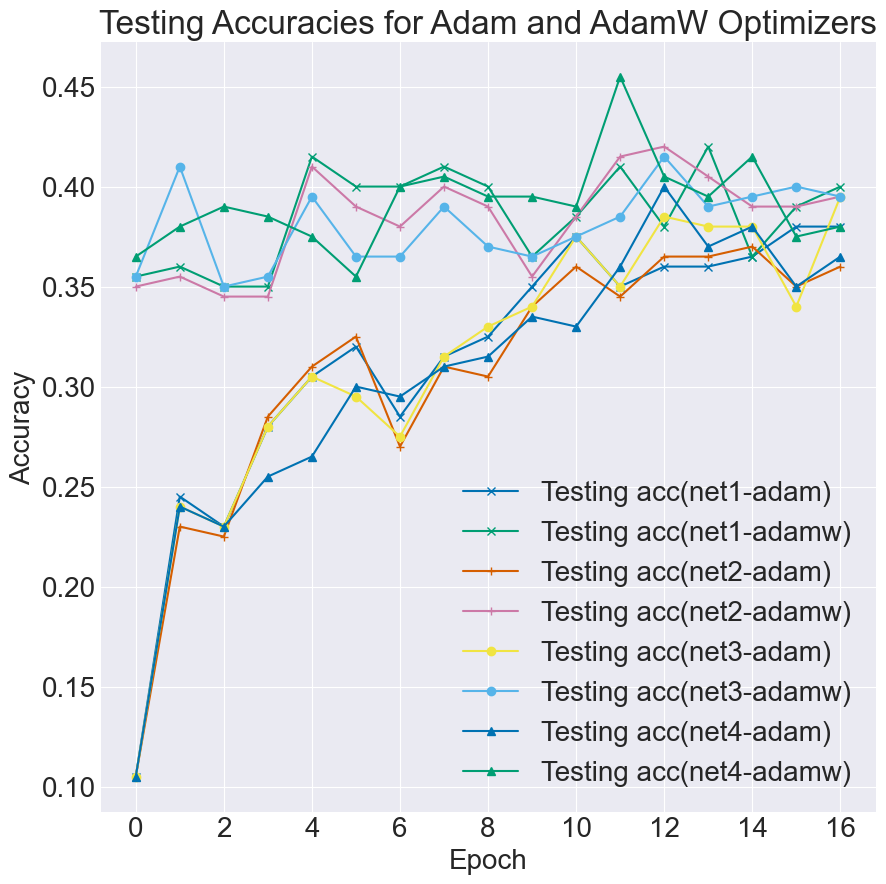

In [ ]:
#The Training and Validation Plots
plt.figure(figsize=(10,10))
plt.plot(net1_test_adam, label='Testing acc(net1-adam)', marker = 'x')
plt.plot(net1_test_adamw, label='Testing acc(net1-adamw)', marker = 'x')

plt.plot(net2_test_adam, label='Testing acc(net2-adam)', marker = '+')
plt.plot(net2_test_adamw, label='Testing acc(net2-adamw)', marker = '+')

plt.plot(net3_test_adam, label= 'Testing acc(net3-adam)', marker = 'o')
plt.plot(net3_test_adamw, label='Testing acc(net3-adamw)', marker = 'o')

plt.plot(net4_test_adam, label='Testing acc(net4-adam)', marker = '^')
plt.plot(net4_test_adamw, label='Testing acc(net4-adamw)', marker = '^')

plt.title('Testing Accuracies for Adam and AdamW Optimizers')
plt.xlabel('Epoch')
plt.ylabel("Accuracy")
plt.legend()
plt.show()